[0.       0.       0.       ... 1.494085 1.496823 1.499945]


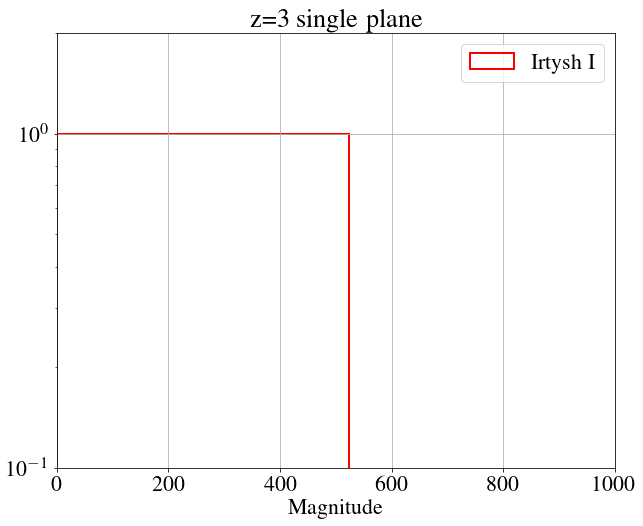

In [83]:

import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
mag1= np.genfromtxt('mag0.dat', dtype=(
    {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))


# mag2= np.genfromtxt('mag2.dat', dtype=(
#     {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
# mag1= np.genfromtxt('mag1.dat', dtype=(
#      {'names': ['ix', 'iy','im' ,'xs','ys','mag'], 'formats': ['f8', 'f8', 'f8','f8', 'f8', 'f8']}))
# # mag2= np.genfromtxt('../mag/magII.dat', dtype=(
# #     {'names': ['ix', 'iy','im' ,'xs','ys','mag'], 'formats': ['f8', 'f8', 'f8','f8', 'f8', 'f8']}))
# mag0= np.genfromtxt('mag0.dat', dtype=(
#     {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))


# for N in {1..10}:
#     mag${N}= np.genfromtxt('mag${N}.dat', dtype=(
#     {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']})); \
# done

# mag1i= np.genfromtxt('../mag/mass.dat', dtype=(
#     {'names': ['is','im' ,'xi','yi','kappa','gamma','mag'], 'formats': ['f8', 'f8', 'f8','f8', 'f8', 'f8', 'f8']}))

m1=np.array(mag1['mag'])

# # N2=len(mag2['mag'])
# # print(N2)


# m1=2.5*np.log10(mag1['mag'])
# # m1=mag1['mag']

# m1=np.array(m1)
# m1=np.trim_zeros(m1)
print(m1)

# m2=2.5*np.log10(mag2['mag'])
# # m2=mag2['mag']
# print(m2)

# m0=2.5*np.log10(mag0['mag'])
# # m2=mag2['mag']



# m1i=2.5*np.log10(mag1i['mag'])



matplotlib.rcParams.update({'font.size': 22})

n_bins = 500
fig, ax = plt.subplots(figsize=(10, 8))

# plot the cumulative histogram
ax.hist(m1, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh I',color='red',linewidth=2)
# ax.hist(m2, n_bins, density=True, histtype='step',cumulative=-1, label='Irtysh II',color='blue',linewidth=2)
# ax.hist(m0, n_bins, density=True, histtype='step',cumulative=-1, label='Empirical',color='Green')

plt.grid(True)
plt.axis([0, 1000, 0.1, 2])
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_single_plane.png', dpi=300)


1
2


/Users/agnivaghosh/.local/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in log10


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


No handles with labels found to put in legend.


40
0.0368893


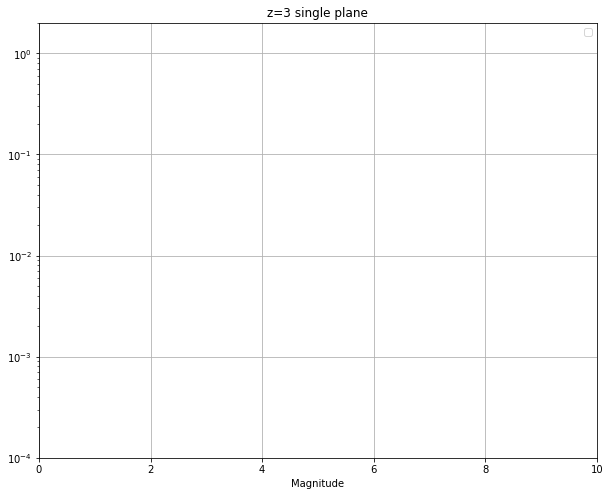

In [38]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(25921)]
muavgsq= [0 for n in range(25921)]


# print(mu)
run_num=40
n_bins = 1000
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('mag*.dat'):
    j=j+1
    print(j)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
    
#     for i in range(len(mag['mag'])):
#         if mag['mag'][i]==0 :
#             mag['mag'][i]=0.000000001
    
    m=2.5*np.log10(mag['mag'])
#     print(len(m))
    muavg=muavg+mag['mag']
    muavgsq=muavgsq+mag['mag']*mag['mag']
    
    
    
#     ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.6)


muavg=muavg/run_num
muavgsq=muavgsq/run_num
for i in range(len(muavg)):
        if muavg[i]==0 :
            print(i)
# ax.hist(muavgsq, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2)
# print(muavgsq)
print(min(muavg))
plt.grid(True)
plt.axis([0, 10, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
fig.savefig('z6.5_ind_runs.png', dpi=300)

In [39]:
muerr=(muavgsq-muavg*muavg)**0.5/muavg

In [40]:
sample = open('errmu.dat', 'w') 
for i in range(len(muavg)):
    print('%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf\t%10.6lf'%(mag['xs'][i], mag['ys'][i], muavg[i], muavgsq[i], muerr[i]),file=sample)